## Adham Kassem

## Introduction
The WeRateDogs Twitter account is known for its humorous dog ratings. In this project, I wrangled and analyzed the WeRateDogs Twitter data to uncover interesting insights about the ratings and the dogs featured.


Importing Libraries/APIs

In [2]:
import pandas as pd
import tweepy 
import requests 
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chapter One : Gathering The archive

In [4]:
archive = pd.read_csv("Data/twitter-archive-enhanced.csv") #The First Step (importing the archive)
#___________________________________________________________________________________________________________

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
open('Data\image_predictions.tsv', 'wb').write(response.content )      #Step 2 downloading image-predections and loading it

predi = pd.read_csv("Data\image_predictions.tsv" , sep = '\t')

Gathering retweets and favourites counts by tweepy

In [ ]:
consumer_key = 
consumer_secret = 
access_token =     
access_token_secret = 

auth = tweepy.OAuth1UserHandler(
consumer_key, consumer_secret,
access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
df = []
with open('Data/tweet_json.txt') as file:
    rows = file.readlines()
    for row in rows:
        data = json.loads(row)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
tweets = pd.DataFrame(df, columns=['tweet_id', 'retweet_count', 'favorite_count'])


# Chapter 2 :Assessing the data

#### the visual assessment :

In [14]:
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7548,35703
1,892177421306343426,5593,30867
2,891815181378084864,3704,23208
3,891689557279858688,7722,38983
4,891327558926688256,8332,37231


In [15]:
archive.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,NaN,NaN,NaN,NaN
96,873580283840344065,NaN,NaN,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/873580283...,13,10,NaN,NaN,NaN,NaN,NaN
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,NaN,NaN,pupper,NaN
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,NaN,NaN,pupper,NaN


In [16]:
predi.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Programmatically Assessing Archive

In [17]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [18]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
predi.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
predi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [22]:
tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2653.586873,7457.370227
std,6.823170e+16,4488.034968,11576.936469
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,537.000000,1297.000000
50%,7.182469e+17,1242.000000,3244.000000
75%,7.986692e+17,3081.500000,9133.500000
max,8.924206e+17,76272.000000,153873.000000


## Conclusion

### Quality Issues

1. A couple of data types that should be changed. timestamp should be have the datetime data type, and the dog stage should be a categorical data type.
2. For all of the stages, it looks like there are variations on the stage names that were not extracted.
3. rating_numerator and rating_denominator. The minimums look too low and the maximums look too high.
4. in predictions It looks like a lot of these duplicated jpg_url are related to retweets.\
5. archive has retweets, which should not be included because we only care about original content from WeRateDogs.
6. It is unlikely that "None" is the name for so many dogs, so these will have to be replaced with NaN. also any value in the name column that do not start with a capital letter. This is a clear indication that it is not actually a name.
7. in predictions that there should not be any rows in which all three predictions are not dogs.
8. Some tweets in archive have missing data for retweet_count or favorite_count (cannot be retrieved elsewhere)

### Tidiness Issues

1. P1, P2, and P3 should be formatted properly in the image table.
2. all dog stages must be in same column represent the stage. same variable in multiple columns
3. Tweet_id in archive table duplicated in image and tweet tables.
4. Remove html tags from the source column in the archive table.



# Chapter 3 : Cleaning The data

first i'm coping all dataframes in case something wrong happend

In [23]:
cleanpr = predi.copy()
cleanarch = archive.copy()
cleantweets = tweets.copy()

Define : merging all the data sets into one set to make the cleaning easier #Tidy

Code:

In [24]:
#Merging the cleaned Enhanced Twitter Archive data with the Tweet Data from Twitter API
cleanarch = pd.merge(cleanarch, cleantweets, on= 'tweet_id', how='left' )
#Merging the resulting merged archive with the Tweet Image Predictions
cleanarch = pd.merge(cleanarch, cleanpr, on= 'tweet_id', how='left' )

test:

In [25]:
cleanarch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

Define : There are some extra numbers in the timestamp column #quailty

Code :

In [26]:
cleanarch['timestamp'] = cleanarch['timestamp'].str.replace(r'\+0000', '',)

Test :

In [27]:
cleanarch['timestamp']

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

Define : correcting time stamp format #quality

Code :

In [28]:
cleanarch.timestamp = pd.to_datetime (cleanarch.timestamp) #1- quality

Test :

In [29]:
cleanarch["timestamp"]

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

Define : Dog Stages are seperated so i'm merging them into one coulmn to make it easier to plot #tidy

Code:

In [30]:
cleanarch["stage"] = np.nan 
#stage = ["doggo" ,"floofer"	,"pupper" ,'puppo'] 
#for loop in stage :
cleanarch.loc[cleanarch["doggo"]=="doggo" , "stage" ]= "doggo"
cleanarch.loc[cleanarch["floofer"]=="floofer" , "stage" ]= "floofer"
cleanarch.loc[cleanarch['puppo']=='puppo' , "stage" ]= 'puppo'
cleanarch.loc[cleanarch["pupper"]=="pupper" , "stage" ]= "pupper"




C:\Users\adham\AppData\Local\Temp\ipykernel_13776\1534252806.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'doggo' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cleanarch.loc[cleanarch["doggo"]=="doggo" , "stage" ]= "doggo"


Test :


In [31]:

cleanarch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

Define : Droping the useless coulmns #quality

Code :

In [32]:
cleanarch.drop('doggo',  axis=1 ,inplace=True)
cleanarch.drop("floofer", axis=1 , inplace=True)
cleanarch.drop("pupper", axis=1, inplace=True)
cleanarch.drop("puppo", axis=1 , inplace=True)
cleanarch = cleanarch [cleanarch.retweeted_status_id.isnull()]
cleanarch = cleanarch.drop(columns=['retweeted_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id'])
cleanarch.drop("name", axis=1 , inplace=True)

#droping the useless coulmns



Test :

In [33]:
cleanarch.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,7548.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,5593.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,3704.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,7722.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,8332.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,https://twitter.com/dog_rates/status/871879754...,13,10,9920.0,...,Shetland_sheepdog,0.969171,True,collie,0.018261,True,Pomeranian,0.008515,True,NaN
107,871762521631449091,NaN,NaN,2017-06-05 16:15:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,https://twitter.com/dog_rates/status/871762521...,12,10,3162.0,...,Labrador_retriever,0.921393,True,golden_retriever,0.064608,True,bloodhound,0.003383,True,pupper
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,3153.0,...,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False,doggo
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,5002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo


In [34]:

cleanarch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   retweet_count          2168 non-null   float64            
 10  favorite_count         2168 non-null   float64            
 11  jpg_url                1994 non-null   object             
 1

Define : fixing tweetid format #quailty

Code:

In [35]:
cleanarch.tweet_id = cleanarch. tweet_id.astype(str)

test :

In [36]:
cleanarch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   retweet_count          2168 non-null   float64            
 10  favorite_count         2168 non-null   float64            
 11  jpg_url                1994 non-null   object             
 1

Define : removing the HTML stuff from the links

Code:

In [37]:
cleanarch["source"]= cleanarch["source"].str.replace( "<a href=" , " ")
cleanarch["source"]= cleanarch["source"].str.replace( "rel=""nofollow"">Twitter for iPhone</a>", " ")

Test:

In [38]:
cleanarch["source"]

0        "http://twitter.com/download/iphone" rel="nof...
1        "http://twitter.com/download/iphone" rel="nof...
2        "http://twitter.com/download/iphone" rel="nof...
3        "http://twitter.com/download/iphone" rel="nof...
4        "http://twitter.com/download/iphone" rel="nof...
                              ...                        
2351     "http://twitter.com/download/iphone" rel="nof...
2352     "http://twitter.com/download/iphone" rel="nof...
2353     "http://twitter.com/download/iphone" rel="nof...
2354     "http://twitter.com/download/iphone" rel="nof...
2355     "http://twitter.com/download/iphone" rel="nof...
Name: source, Length: 2175, dtype: object

Storing Data

In [ ]:
cleanarch.to_csv("Data/twitter_archive_master.csv")

In [ ]:
cleanarch["stage"] = cleanarch["stage"].dropna()

In [41]:
cleanarch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   retweet_count          2168 non-null   float64            
 10  favorite_count         2168 non-null   float64            
 11  jpg_url                1994 non-null   object             
 1

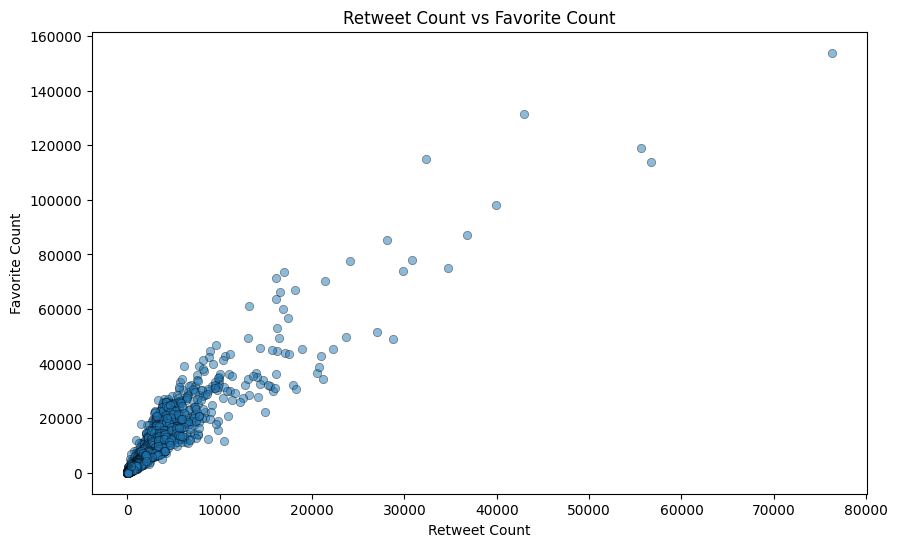

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retweet_count', y='favorite_count', data=cleanarch, alpha=0.5 , edgecolor="black")
plt.title('Retweet Count vs Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.show()

In [43]:
dog_stages_series = pd.Series(cleanarch["stage"]) 
stage_counts = dog_stages_series.value_counts()

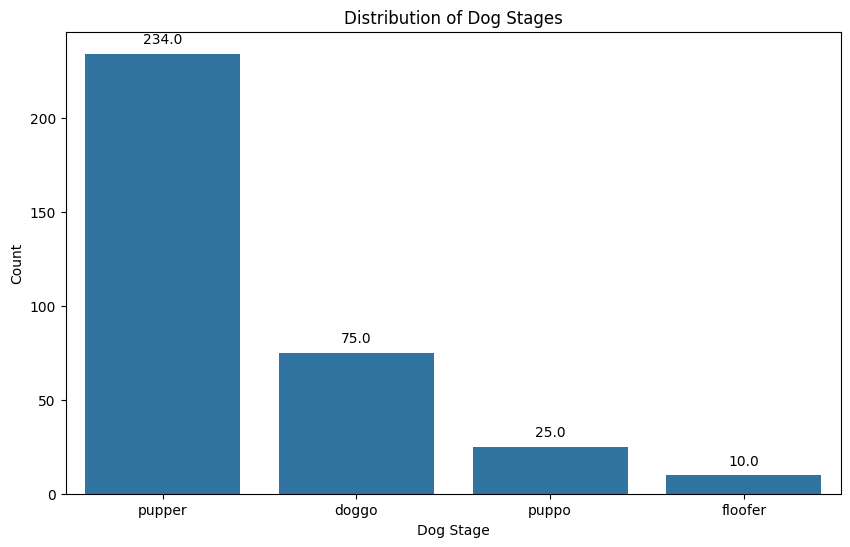

In [49]:
plt.figure(figsize=(10, 6))

sns.countplot(data=cleanarch, x='stage', order=stage_counts.index)

# Add labels and title
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.title('Distribution of Dog Stages')

# Annotate each bar with the count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

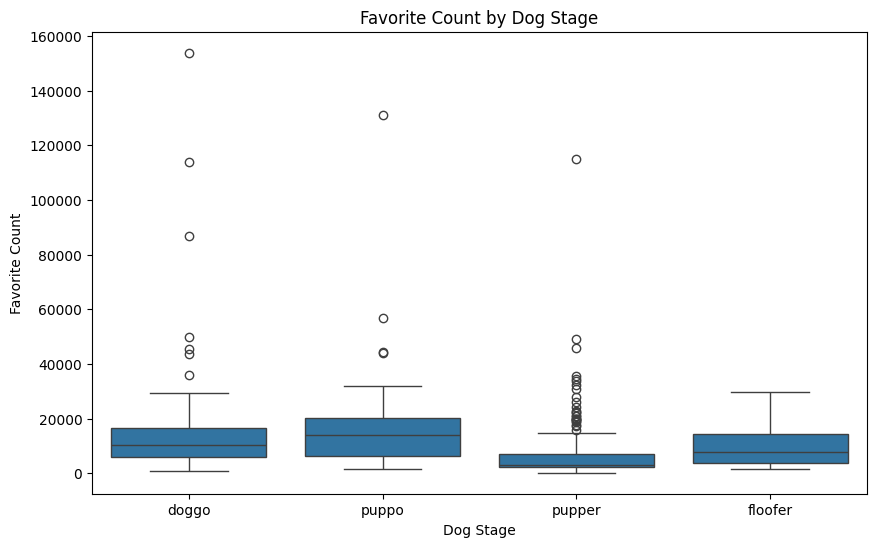

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stage', y='favorite_count', data=cleanarch)
plt.title('Favorite Count by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Favorite Count')
plt.show()

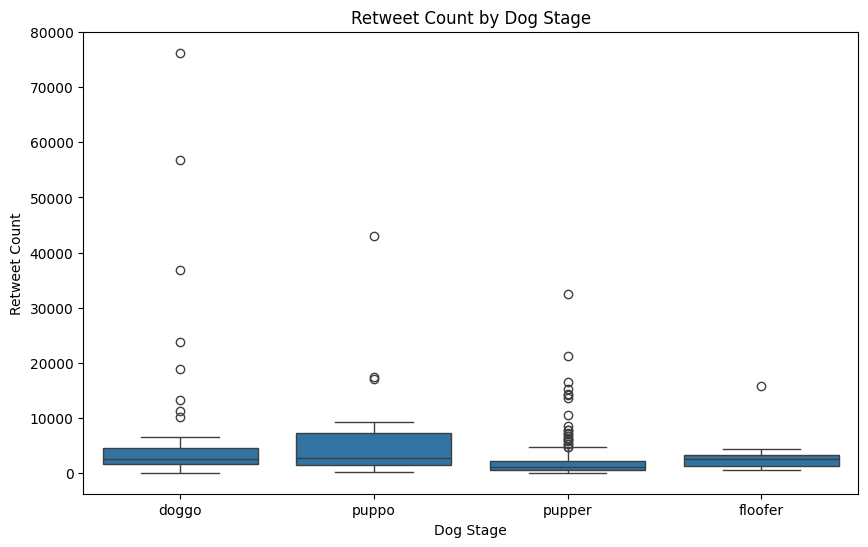

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stage', y='retweet_count', data=cleanarch)
plt.title('Retweet Count by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Retweet Count')
plt.show()

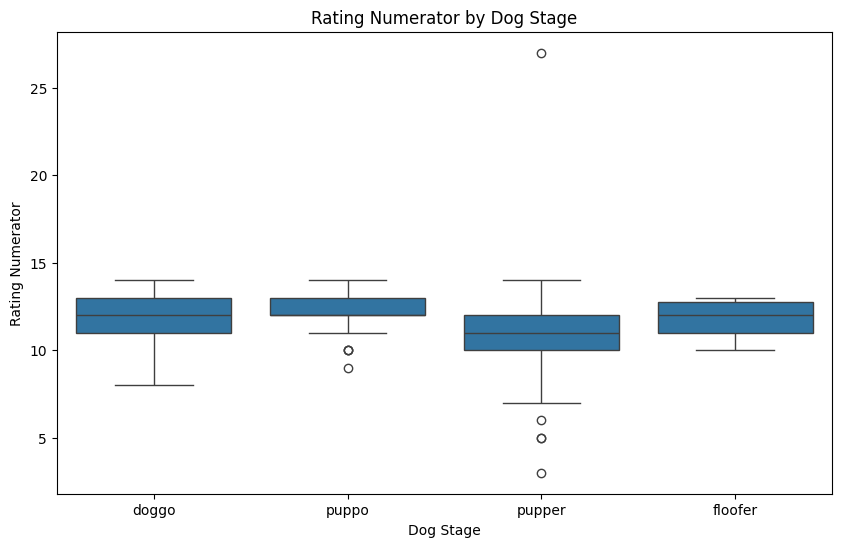

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stage', y='rating_numerator', data=cleanarch)
plt.title('Rating Numerator by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Rating Numerator')
plt.show()